In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df1 = pd.read_excel('final_data.xlsx', sheet_name='final_data', names=['Job_position', 'Company', 'Location', 'Salary', 'posting_time', 'requirements', 'rating', 'experience', 'link'],
                    na_values=['#NAME?'], engine='openpyxl' )

In [3]:
df2 = pd.read_excel('software_dev.xlsx', sheet_name='new_jobs', names=['Job_position', 'Company', 'Location', 'Salary', 'posting_time', 'requirements', 'rating', 'experience', 'link'],
                    na_values=['#NAME?'], engine='openpyxl' )

In [4]:
df = pd.concat([df1, df2])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16481 entries, 0 to 6749
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job_position  16481 non-null  object
 1   Company       16481 non-null  object
 2   Location      16481 non-null  object
 3   Salary        16481 non-null  object
 4   posting_time  16481 non-null  object
 5   requirements  16481 non-null  object
 6   rating        16481 non-null  object
 7   experience    16481 non-null  object
 8   link          16481 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [7]:
# link & posting time for the jobs columns are not important for our analysis so we will drop them
df.drop('link', axis=1, inplace=True) 
df.drop('posting_time', axis=1, inplace=True) 

In [8]:
df.head()

,Job_position,Company,Location,Salary,requirements,rating,experience
0,Junior Software Developer\nnew,Gather Network,"Urban Estate Gurgaon, Haryana","\n₹20,000 a month",We are actively looking for a few freshers who...,na,na
1,Big Data Developer\nnew,Agile Placement,"Pune, Maharashtra","\n₹5,00,000 - ₹14,00,000 a year",_Strong knowledge of programming and scripting...,na,Total work: 6 years
2,Data Scientist\nnew,Client of PlaceElements HR,"Thiruvananthapuram, Kerala","\n₹5,00,000 - ₹10,00,000 a year",Experience in working closely with data analys...,na,Python: Algorithms: Statistics: 1 yearData Sci...
3,Software Engineer - Machine Learning Engineer,Siemens Technology and Services Private Limited,"Pune, Maharashtra",na,Experience with machine learning architectures...,\n4.0\n\n\n\n\n,na
4,Machine Learning (Fullstack) at Sadhashiva Nag...,Teqlinx Software Solutions LLC,"Bengaluru, Karnataka","\n₹30,00,000 a year",• Extremely strong programming background – da...,na,na


In [9]:
print('Length of Duplicated rows', len(df[df.duplicated()]))

Length of Duplicated rows 15355


In [10]:
freq = df[df.duplicated()]['Company'].value_counts()

In [11]:
freq

Shaw Academy                             1533
Solvencia Technologies Pvt Ltd           1456
Lunavo Labs                              1071
Integrated Personnel Services Limited    1035
Manappuram Finance Limited                943
                                         ... 
Vyvin                                       1
Version 1                                   1
i2k2 Networks                               1
Inncrewin Technologies PVT LTD              1
Moving Walls India Pvt Ltd                  1
Name: Company, Length: 76, dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['posting_frequency'] = df['Company'].map(freq)

In [14]:
df['posting_frequency'].fillna(1, inplace=True)

In [15]:
print(df[df['Company'] == 'BMC Software'])

              Job_position       Company           Location Salary  \
510  Information Developer  BMC Software  Pune, Maharashtra     na   

                                          requirements           rating experience  \
510  Under direction from IDD management and lead i...  \n4.0\n\n\n\n\n         na   

     posting_frequency  
510                1.0  


In [16]:
df['Job_position'] = df['Job_position'].apply(lambda x: str(x).replace('\nnew',''))

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.index = np.arange(0,len(df))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_position       1124 non-null   object 
 1   Company            1124 non-null   object 
 2   Location           1124 non-null   object 
 3   Salary             1124 non-null   object 
 4   requirements       1124 non-null   object 
 5   rating             1124 non-null   object 
 6   experience         1124 non-null   object 
 7   posting_frequency  1124 non-null   float64
dtypes: float64(1), object(7)
memory usage: 79.0+ KB


In [20]:
df['rating'] = df.rating.apply(lambda x: x.replace('\n',''))

In [21]:
df['Salary'].fillna('-999', inplace=True)

In [22]:
df['Salary'] = df['Salary'].apply(lambda x: str(x).replace('\n',''))
df['Salary'] = df['Salary'].apply(lambda x: str(x).replace('₹',''))

In [23]:
df[df['experience'] == 'Higher Secondary(12th Pass)'].index

Int64Index([188, 294, 390, 723], dtype='int64')

In [24]:
net_experience = []
for i in df.experience:
    temp=[]
    for word in i.split():
        if word.isdigit():
            temp.append(word)
    if temp:
        temp.sort(reverse=True)
        net_experience.append(temp[0])
    else:
        net_experience.append(-99)

In [25]:
df['net_experience'] = net_experience

In [26]:
df.head()

,Job_position,Company,Location,Salary,requirements,rating,experience,posting_frequency,net_experience
0,Junior Software Developer,Gather Network,"Urban Estate Gurgaon, Haryana","20,000 a month",We are actively looking for a few freshers who...,na,na,1.0,-99
1,Big Data Developer,Agile Placement,"Pune, Maharashtra","5,00,000 - 14,00,000 a year",_Strong knowledge of programming and scripting...,na,Total work: 6 years,1.0,6
2,Data Scientist,Client of PlaceElements HR,"Thiruvananthapuram, Kerala","5,00,000 - 10,00,000 a year",Experience in working closely with data analys...,na,Python: Algorithms: Statistics: 1 yearData Sci...,1.0,2
3,Software Engineer - Machine Learning Engineer,Siemens Technology and Services Private Limited,"Pune, Maharashtra",na,Experience with machine learning architectures...,4.0,na,1.0,-99
4,Machine Learning (Fullstack) at Sadhashiva Nag...,Teqlinx Software Solutions LLC,"Bengaluru, Karnataka","30,00,000 a year",• Extremely strong programming background – da...,na,na,1.0,-99


In [27]:
df['net_experience'] = df['net_experience'].astype('int32')

<AxesSubplot:xlabel='net_experience'>

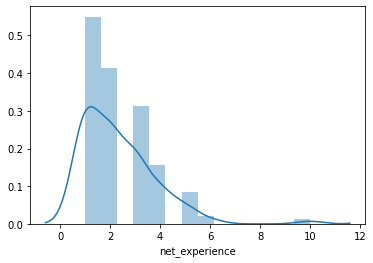

In [28]:
sns.distplot(df[df['net_experience']>0]['net_experience'])

In [29]:
net_experience = []
for i in df.requirements:
    temp=[]
    for word in i.split():
        if word.isdigit():
            temp.append(word)
    if temp:
        temp.sort(reverse=True)
        net_experience.append(temp[0])
    else:
        net_experience.append(-99)

In [30]:
df['exp2'] = net_experience


In [31]:
for p in ['²', '0080091', '2020', '2024', '2019', '90', '88', '32', '48', '40', '50', '24']:
    df['exp2'] = df['exp2'].apply(lambda x: str(x).replace(p,'-99'))

In [32]:
df['exp2'] = df['exp2'].astype('int32')

In [33]:
df['net_experience'] = df['net_experience'].where((df['net_experience']>0), df['exp2'])
df.drop('exp2', axis=1, inplace=True)

In [34]:
df['net_experience'][[188, 294, 390, 723]] = 0

<ipython-input-34-a0b9b4ea4fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['net_experience'][[188, 294, 390, 723]] = 0
c:\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='rating'>

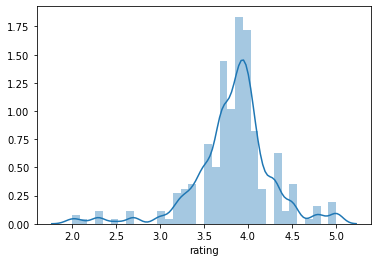

In [49]:
sns.distplot(df[df['rating']>0]['rating'])

In [48]:
df['rating'].where(df['rating'] != 'na', -99, inplace=True)
df['rating'] = df['rating'].astype('float64')

In [74]:
if 'Bachelor' in df.iloc[10]['experience'].replace('year', ' ').split("'"):
    print('yes')

In [79]:
df.iloc[10]['experience'].replace('year', ' ').split("'")[0]

'DataEngineer/ETL Developer: 1  DataWarehousing: 1  Bachelor'

In [87]:
df.iloc[29]['experience'].replace('year', ' ').split("'")

['.Net: 3  sWork: 3  sTotal work: 3  s']

In [106]:
df['experience'][22].replace('year',' ').replace('years',' ').replace("'",' ').split()

['Bachelor', 's']

In [117]:
def education_level(data):
    if 'bachelor' in data.replace('year',' ').replace("'",' ').lower().split():
        return 'bachelor'
    if 'secondary' in data.replace('year',' ').replace('(',' ').replace("'",' ').lower().split():
        return 'secondary'
    if 'master' in data.replace('year',' ').replace("'",' ').lower().split():
        return 'masters'

In [118]:
df['experience'].map(education_level).value_counts()

bachelor     62
secondary     5
masters       1
Name: experience, dtype: int64

In [50]:
df.head()

,Job_position,Company,Location,Salary,requirements,rating,experience,posting_frequency,net_experience
0,Junior Software Developer,Gather Network,"Urban Estate Gurgaon, Haryana","20,000 a month",We are actively looking for a few freshers who...,-99.0,na,1.0,-99
1,Big Data Developer,Agile Placement,"Pune, Maharashtra","5,00,000 - 14,00,000 a year",_Strong knowledge of programming and scripting...,-99.0,Total work: 6 years,1.0,6
2,Data Scientist,Client of PlaceElements HR,"Thiruvananthapuram, Kerala","5,00,000 - 10,00,000 a year",Experience in working closely with data analys...,-99.0,Python: Algorithms: Statistics: 1 yearData Sci...,1.0,2
3,Software Engineer - Machine Learning Engineer,Siemens Technology and Services Private Limited,"Pune, Maharashtra",na,Experience with machine learning architectures...,4.0,na,1.0,-99
4,Machine Learning (Fullstack) at Sadhashiva Nag...,Teqlinx Software Solutions LLC,"Bengaluru, Karnataka","30,00,000 a year",• Extremely strong programming background – da...,-99.0,na,1.0,-99
